In [1]:
import sys
sys.path.append('../..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from pyslise2d import Pyslise2D
from pqdm.processes import pqdm
import numpy as np

V = lambda x, y: (x**2+1)*(y**2+1)

def eigenvalues(ymax):
    p = Pyslise2D(V, -5.5,5.5, -5.5,ymax, tolerance=1e-8)
    return p.eigenvalues(0, 20)

In [3]:
ymaxs = np.linspace(-2, 5.5, 200)
found_eigenvalues = pqdm(ymaxs, eigenvalues, 10)

QUEUEING TASKS | :   0%|          | 0/200 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/200 [00:00<?, ?it/s]

MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate

KeyboardInterrupt



In [ ]:
data = []

for ymax, es in zip(ymaxs, found_eigenvalues):
    for i, E, m in es:
        while len(data) < i+m:
            data.append([])
        for j in range(m):
            data[i+j].append((ymax, E))

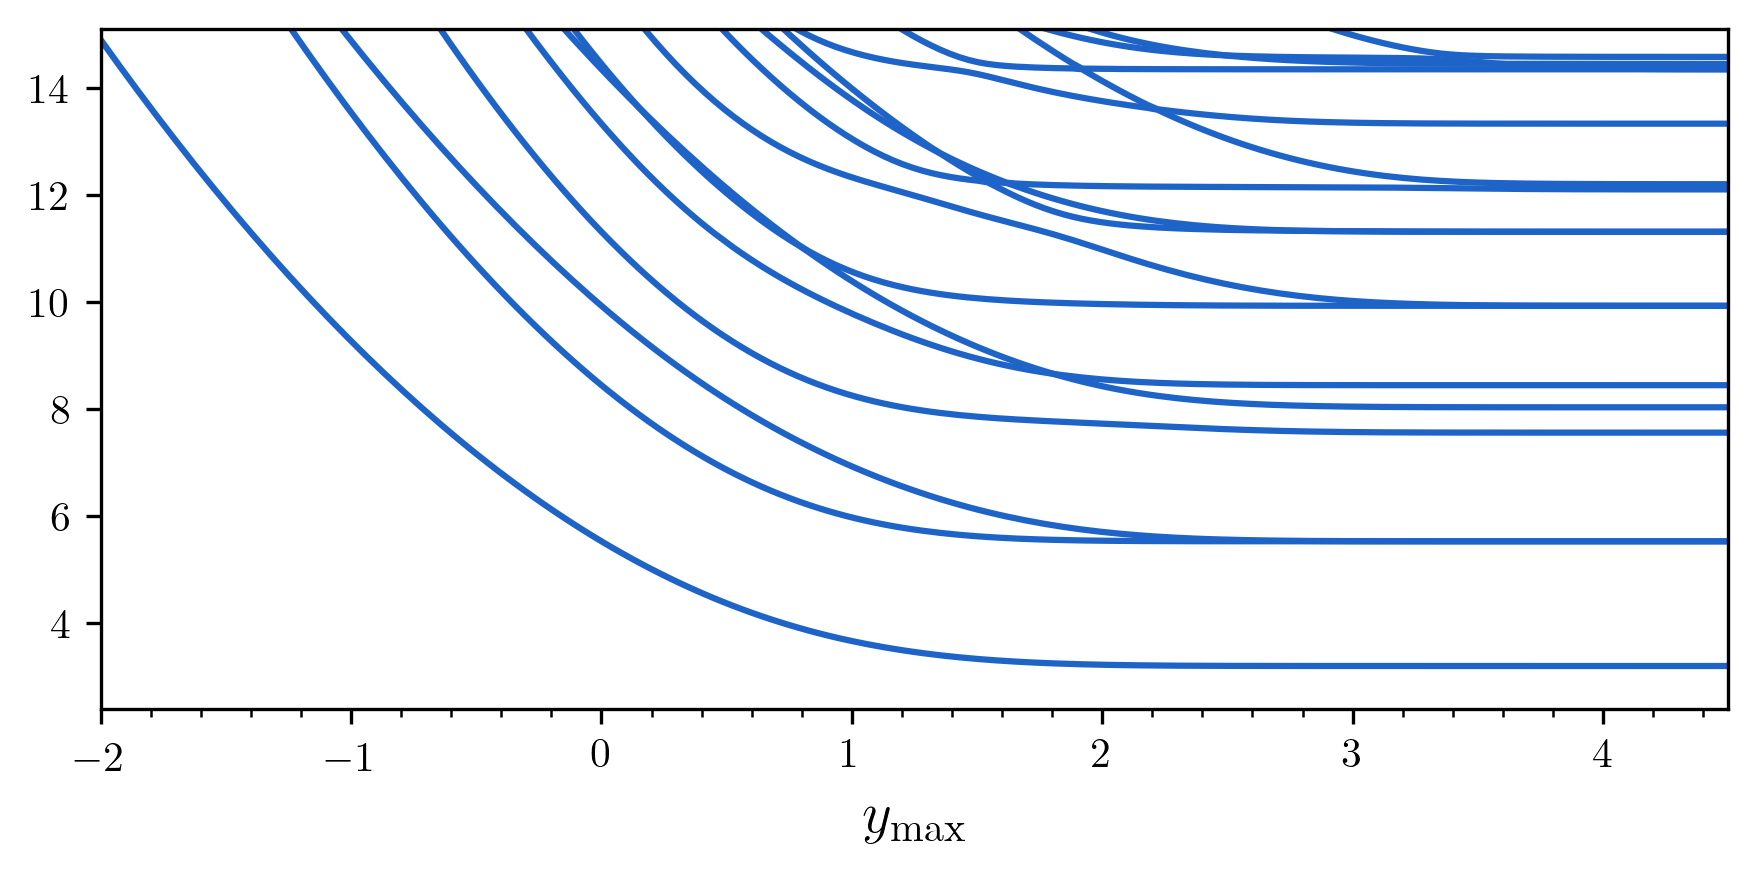

In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(7,3), dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(r'$y_\text{max}$', fontsize=14)

for l in data:
    plt.plot(*zip(*l), color=ugent.blauw)

plt.xlim(-2, 4.5)
plt.ylim(2.4, 15.1)
    
ax.xaxis.set_minor_locator(MultipleLocator(float(0.2)))

plt.savefig("./counting_eigenvalues.pdf", bbox_inches="tight")

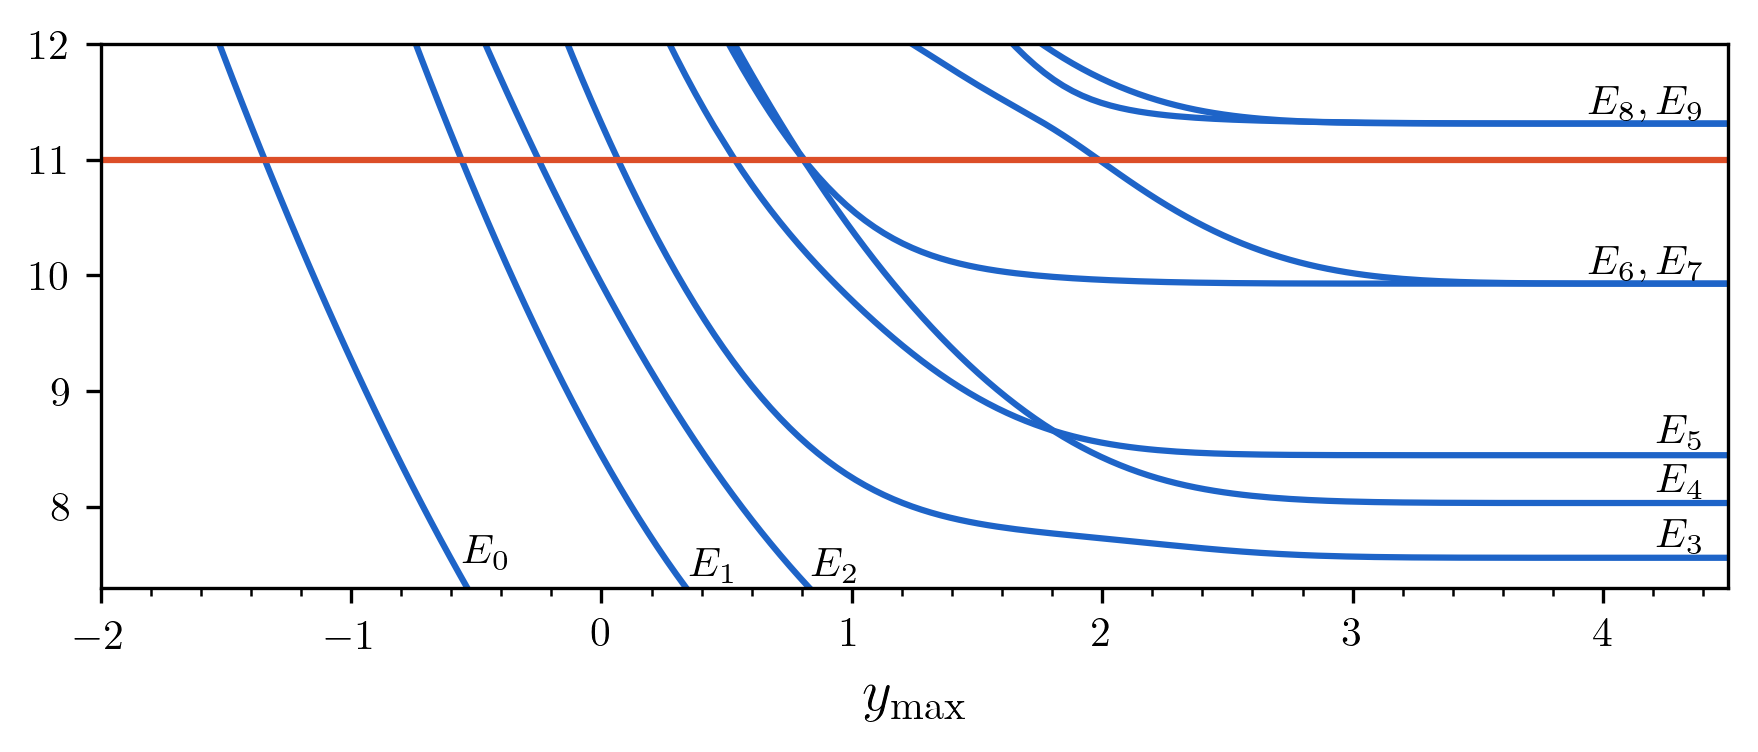

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(7,2.4), dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(r'$y_\text{max}$', fontsize=14)

for l in data:
    plt.plot(*zip(*l), color=ugent.blauw)

plt.plot((-3,6), (11,11), color=ugent.rood)

labels = [] # (y, E, [i, j])
for i, row in enumerate(data[:10]):
    for y, E in row[-2::-1]:
        if E >= 7.29:
            break
    y = min(4.4, y)
    for ly, lE, li in labels:
        if abs(ly - y) < 1e-4 and abs(lE - E) < 1e-4:
            li.append(i)
            break
    else:
        labels.append((y, E, [i]))


for y, E, ijs in labels:
    text = ', '.join(f'E_{{{i}}}' for i in ijs)
        
    if ijs[0] < 3:
        y += 0.2
    plt.text(y, E+0.02, f"${text}$", ha="right", va="bottom")
    
plt.xlim(-2, 4.5)
plt.ylim(7.3, 12)
    
ax.xaxis.set_minor_locator(MultipleLocator(float(0.2)))


plt.savefig("./counting_eigenvalues_zoom.pdf", bbox_inches="tight")

In [4]:
E = 11

def error(E, ymax):
    p = Pyslise2D(V, -5.5,5.5, -5.5,ymax, tolerance=1e-8)
    return p.__matchingError(E)[0]

def find_ymax(E, a, b):
    fa = error(E, a)
    fb = error(E, b)
    while b - a > 1e-6:
        c = (a+b)/2.
        fc = error(E, c)
        if fc*fa > 0:
            a, fa = c, fc
        else:
            b, fb = c, fc
    return (a+b)/2.
    

def find_ymax_for_row(row):
        last_ymax = -5.5
        for ymax, e in row:
            if e < E:
                return find_ymax(E, last_ymax, ymax)
            last_ymax = ymax

In [5]:
pure_ymaxs = list(filter(lambda x: x is not None, pqdm(data, find_ymax_for_row, n_jobs=8)))
pure_ymaxs

NameError: name 'data' is not defined

In [6]:
pure_ymaxs = [-1.34491179043189,
 -0.5587537378296817,
 -0.251214565191054,
 0.06581373860065184,
 0.5326053361247357,
 0.8084498240535419,
 0.8084498240535419,
 1.9862659999302452]

In [7]:
merged_pure_ymaxs = []
for ymax in pure_ymaxs:
    if merged_pure_ymaxs and abs(ymax - merged_pure_ymaxs[-1][0]) < 1e-6:
        merged_pure_ymaxs[-1][1] += 1
    else:
        merged_pure_ymaxs.append([ymax, 1])
merged_pure_ymaxs = list(map(tuple, merged_pure_ymaxs))

In [8]:
def eigenfunction(E, ymax, m):
    p = Pyslise2D(V, -5.5,5.5, -5.5,ymax, tolerance=1e-8)
    es = p.eigenvalues(E-1, E+1)
    fs = []
    es.sort(key=lambda iEm: abs(iEm[1] - E))
    for _, e, _ in es:
        fs += p.eigenfunction(e)
        if len(fs) >= m:
            break
    return fs
    
efs = sum(([(ymax, f) for f in eigenfunction(E, ymax, m)] for ymax, m in merged_pure_ymaxs), [])
efs

MatsliseND: max search depth reached


[(-1.34491179043189, <pyslise2d.Eigenfunction2D at 0x7fcbd36ae370>),
 (-0.5587537378296817, <pyslise2d.Eigenfunction2D at 0x7fcc001f3cf0>),
 (-0.251214565191054, <pyslise2d.Eigenfunction2D at 0x7fcbd9a09ab0>),
 (0.06581373860065184, <pyslise2d.Eigenfunction2D at 0x7fcbd8d44f30>),
 (0.5326053361247357, <pyslise2d.Eigenfunction2D at 0x7fcbd8d44fb0>),
 (0.8084498240535419, <pyslise2d.Eigenfunction2D at 0x7fcbd2f4ac70>),
 (0.8084498240535419, <pyslise2d.Eigenfunction2D at 0x7fcbd9a99d30>),
 (1.9862659999302452, <pyslise2d.Eigenfunction2D at 0x7fcbd2f32170>)]

MatsliseND: max search depth reached
MatsliseND: max search depth reached


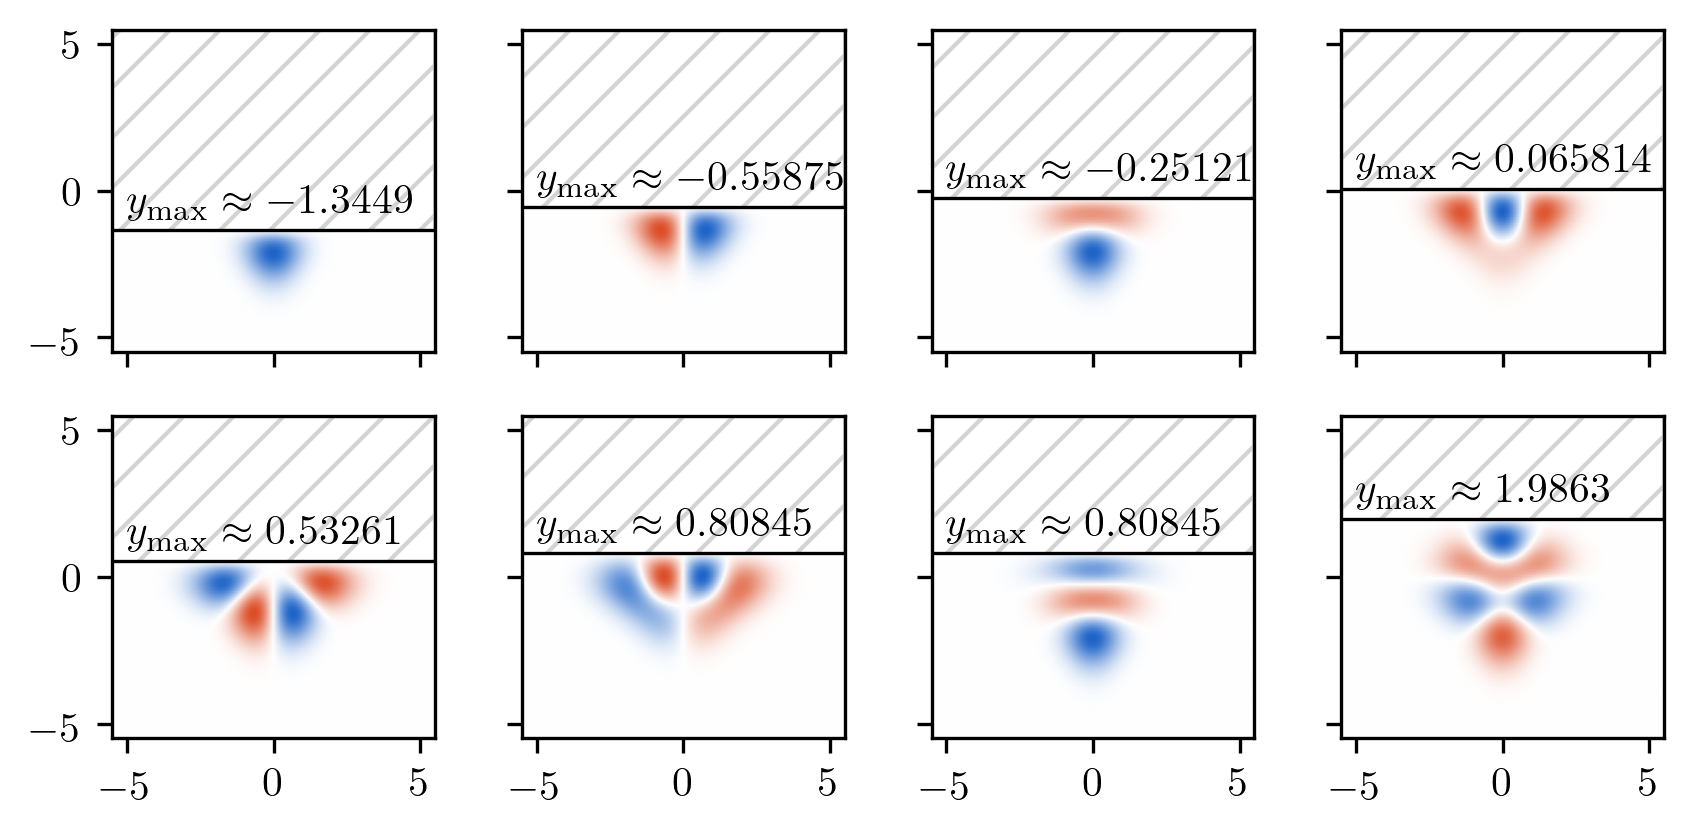

MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate


In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


fig, axs = plt.subplots(2, 4, figsize=(5.8, 2.9), sharex=True, dpi=300)

for row in axs:
    for ax in row:
        ax.set_xticks([-5,0,5])
        ax.set_yticks([-5,0,5])
        ax.set_xlim(-5.5,5.5)
        ax.set_ylim(-5.5,5.5)
        
for row in axs:
    for ax in row[1:]:
        ax.tick_params('y', labelleft=False)
        
for row in list(axs)[:-1]:
    for ax in row:
        ax.tick_params('x', labelbottom=False)
        
        # ax.axis('off')
        # ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
        # ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())

xs = np.linspace(-5.5, 5.5, 200)
ys = np.linspace(-5.5, 5.5, 200)
        
for plot_i, (ymax, f) in enumerate(efs):
    ysl = ys[np.where(ys < ymax)]
    data = f(xs, ysl)
    m = np.max(np.abs(data))
    ax = axs[plot_i // 4, plot_i%4]
    ax.set_aspect(1)
    
    domain = patches.Rectangle((-5.5,-5.5), 11, ymax+5.5, facecolor="none")
    ax.add_patch(patches.Rectangle((-5.5,-5.5), 11, 11, hatch="//", edgecolor="lightgray", facecolor="none", zorder=0))
    ax.add_patch(domain)
    
    ax.axhline(ymax, color="black", lw=0.8)
    ax.text(-5, ymax+0.6, f"$y_{{\\text{{max}}}} \\approx {float(ymax):.5}$")
    
    ax.pcolormesh(xs, ysl, data.T, shading='gouraud', vmin=-m, vmax=m, cmap=ugent.RdBu, clip_on=True, clip_path=domain, zorder=1)

plt.tight_layout()
plt.savefig("./ixaru.png", bbox_inches="tight", dpi=1000)

In [14]:
eigenvalues(0.8084498240535419)

[(0, 3.8825534870112253, 1),
 (1, 6.238022650501378, 1),
 (2, 7.349218548551334, 1),
 (3, 8.56509447349283, 1),
 (4, 10.215167863903467, 1),
 (5, 10.995351657517881, 1),
 (6, 11.000000396219813, 1),
 (7, 12.673653050709554, 1),
 (8, 13.681899871652206, 1),
 (9, 14.449103577601507, 1),
 (10, 14.754315047969843, 1),
 (11, 15.028645698928148, 1),
 (12, 16.542325415145275, 1),
 (13, 17.009403416868043, 1),
 (14, 17.796019967721932, 1),
 (15, 18.567871052108863, 1),
 (16, 18.835256979584994, 1),
 (17, 19.245738216213162, 1),
 (18, 19.56077182268563, 1)]

In [13]:
eigenfunction(10.995351825172627, 0.808449774077445)